In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from preprocessing import preprocess_hf_for_lasso
from sklearn.model_selection import train_test_split


TEST_SIZE=0.2

heart_failure = pd.read_csv("heart_failure/train_val_split.csv")
labels = heart_failure.pop("HeartDisease")

# Get the columns with non-numeric output
non_numeric_columns = heart_failure.select_dtypes(exclude=np.number).columns
# Create dummy variables for non-numeric columns
heart_failure_dummies = pd.get_dummies(heart_failure, columns=non_numeric_columns)
features = heart_failure_dummies.columns

x_train, x_valid, y_train, y_valid = train_test_split(heart_failure_dummies, labels, test_size=TEST_SIZE)




print(np.shape(x_train))
print(np.shape(x_valid))




(587, 20)
(147, 20)


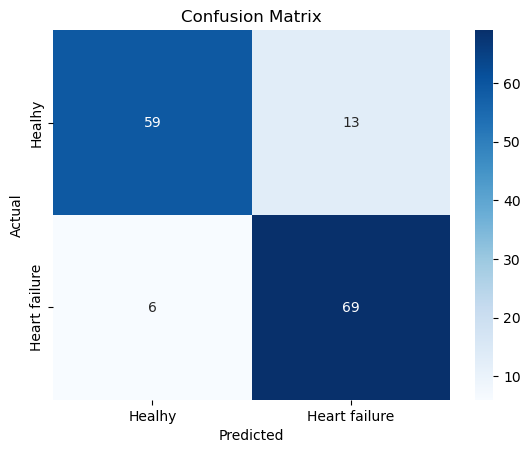

0.8707482993197279

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns

clf = MLPClassifier(max_iter=1000,validation_fraction=0.2,early_stopping=True).fit(x_train, y_train)

#clf.predict_proba(x_valid)


y_pred = clf.predict(x_valid)
cm = confusion_matrix(y_valid, y_pred)


# Define the labels for the confusion matrix
labels = ['Healhy', 'Heart failure']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set the title and labels of the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()



#clf.score(x_train, y_train)
clf.score(x_valid, y_valid)






Using 587 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/147 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


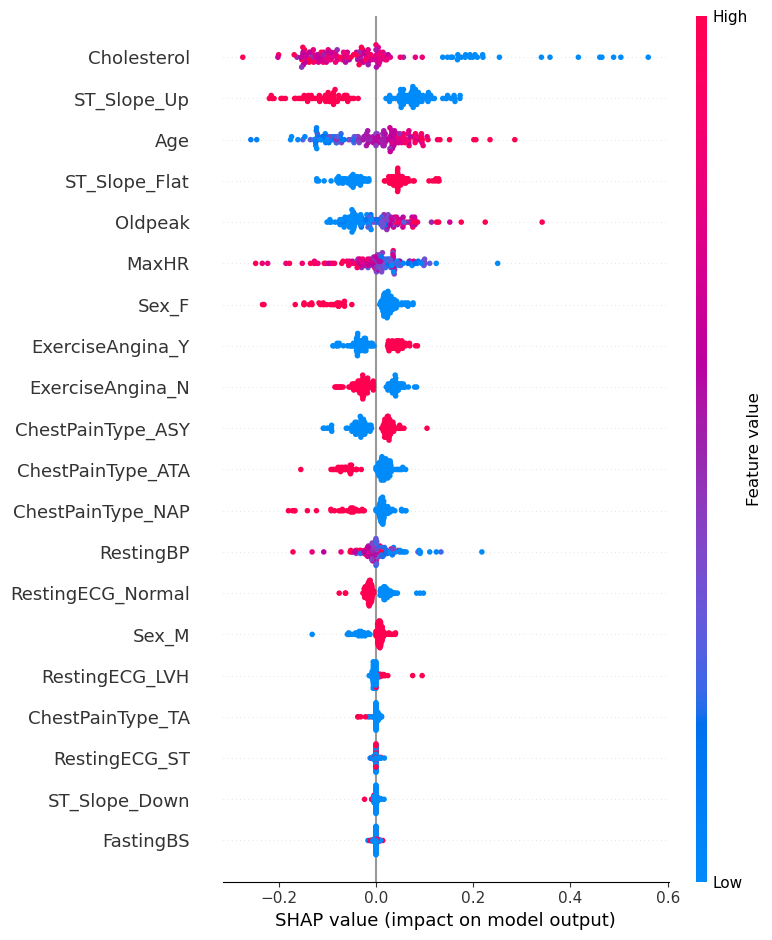

In [57]:
import shap

explainer = shap.KernelExplainer(clf.predict,x_train)
shap_values = explainer.shap_values(x_valid,nsamples=200)
shap.summary_plot(shap_values,x_valid,feature_names=features)

In [64]:
print(np.shape(shap_values[0,:]))
print(x_valid.iloc[0,:])


(20,)
Age                     63
RestingBP              126
Cholesterol              0
FastingBS                0
MaxHR                  120
Oldpeak                1.5
Sex_F                False
Sex_M                 True
ChestPainType_ASY     True
ChestPainType_ATA    False
ChestPainType_NAP    False
ChestPainType_TA     False
RestingECG_LVH       False
RestingECG_Normal    False
RestingECG_ST         True
ExerciseAngina_N      True
ExerciseAngina_Y     False
ST_Slope_Down         True
ST_Slope_Flat        False
ST_Slope_Up          False
Name: 353, dtype: object


In [66]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0,:],x_valid.iloc[0,:],feature_names=features)